In [54]:
# Importing Libraries 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [44]:
# Load dataset : tf.keras.dataset.mnist
# This data set contains 70,000 28x28 black&white images of digits (0-9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizing Data : images have pixel values in range [0, 255] - RGB values (Red, Blue, Green colors from range [0, 255].) 
# dynamic range of images 0-255, by /255 we change the range from 0-1. This makes training the model faster.
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Check data type : ensure data is correct format before training.
dataType = x_train.dtype
print(f"Data type: {dataType}")
labelType = y_test.dtype
print(f"Data type: {labelType}")

Data type: float64
Data type: uint8


In [45]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

In [46]:
# K-Fold Cross Validation
kf = KFold(n_splits=5)

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model.fit(x_train_fold, y_train_fold, epochs = 10, verbose = 0)
    
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Validation accuracy for this fold : {val_acc * 100:.2f}%")



Validation accuracy for this fold : 99.83%
Validation accuracy for this fold : 99.78%
Validation accuracy for this fold : 99.92%
Validation accuracy for this fold : 99.92%
Validation accuracy for this fold : 99.97%


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9791 - val_loss: 0.0884
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9981 - loss: 0.0061 - val_accuracy: 0.9779 - val_loss: 0.0894
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9985 - loss: 0.0053 - val_accuracy: 0.9780 - val_loss: 0.0858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9804 - val_loss: 0.0932
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9812 - val_loss: 0.0912
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 0.9807 - val_loss: 0.0991
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9812 - val_loss: 0.0916
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9979 - loss: 0.0062 - 

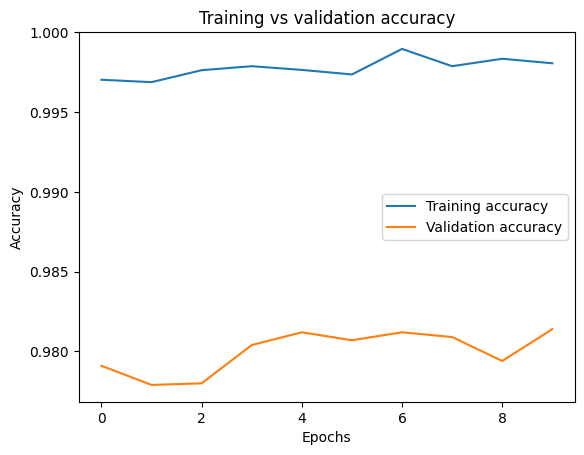

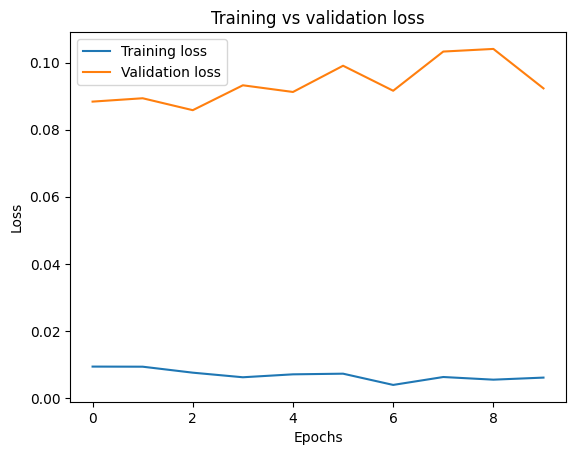

In [50]:
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), verbose = 1)

plt.plot(history.history['accuracy'], label = 'Training accuracy' )
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs validation accuracy')
plt.show()

plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs validation loss')
plt.show()

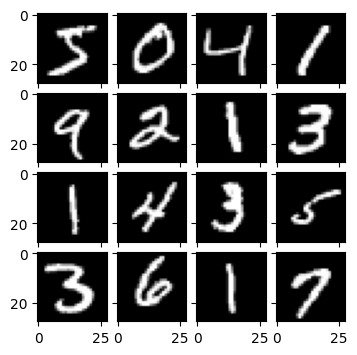

In [47]:
# Data visualization : Display 16 images from training set for visual confirmation of data.
# Imports used in this section: matplotlib.pyplot as plt & mpl_toolkits.axes_grid1 import ImageGrid 
im_list = [] # Empty list to store sample images.
n_samples_to_show = 16 # Number of images to display (4x4 grid)
for i in range(n_samples_to_show):
    im_list.append(x_train[i]) # This appends the first 16 used to visually confirm data.
    
# Visualization
# Setting up 4x4 grid to visualize images.
fig = plt.figure(figsize=(4., 4.)) # setting figure size.

# Ref https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

grid = ImageGrid(fig, 111, # similar to subplot(111), used ImageGrid for custom layout.
    nrows_ncols = (4,4), # 4row x 4col grid
    axes_pad = 0.1, # padding between grid.
                 )

# Display image grid.
for ax, im in zip(grid, im_list):
    # Iterating over the grind returns the Axes.
    ax.imshow(im, 'gray') #show each image in grayscale
plt.show() # Show entire grid.


In [48]:
# Model Build
# Building Multi-Layer Perceptron using Keras.
# This model classifies digits (0-9), output = 10 classes.
NUM_CLASSES = 10 # num of classes (0-9)


# Here we define a Sequential model that processes data layer by layer.
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = tf.keras.Sequential([
    
    # Input Layer : Explicitly define the input shape as (28, 28).
    # Flatten the 28x28 images into 1D vector, as Dense layers expect 1D vector as input.
    
    tf.keras.Input(shape=(28, 28)), # Input layer as shape 28x28.
    tf.keras.layers.Flatten(), # Creating a flat vector, disregarding locality of features,Representing image as vector.
    tf.keras.layers.Dense(256, activation='relu'), # Feeding vector to dense layer, with activation ReLU with 256 neurons.
    
    # ReLU: Adds non-linearity by taking the sum of weighted inputs, and adjusts the output. If the sum of weighted input is above 0, it will output itself, if < 0, then it will output 0. This prevents negative inputs from firing negative values.
    
    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid') # Outputs NUM_CLASSES ( number of classes) & with sigmoid activation.
    # Sigmoid : squashes output to propability between 0 & 1 for each class.
])

# Compiling model with high-level keras
# https://www.tensorflow.org/api_docs/python/tf/keras/Model
model.compile(optimizer='adam',
              # using adam optimizer - used to adjust learning rate dynamically.
              
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              
              # Loss : SparseCategoricalCrossentropy is used here as we are dealing with integer labels (0-9)
              
              # = False, but why? logits are outputs without activation, so we must set as  False as we are using sigmoid, which is the activation function. If it was left True, the model would assume that we are not using activation function and try to set the default one on its own.
              
              # Evaluate model via accuracy
              
              metrics=['accuracy'])

# Model training - using data (x_train, y_train) for 10 epochs - 10 iterations.
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8939 - loss: 0.3781
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9691 - loss: 0.0999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9807 - loss: 0.0616
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9876 - loss: 0.0415
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9911 - loss: 0.0295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9934 - loss: 0.0209
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9952 - loss: 0.0164
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9959 - loss: 0.0145
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9966 - loss: 0.0110
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9974 - loss: 0.0079


In [55]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [49]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
# Evaluation function calculates loss and accuracy on test data.
eval_loss, eval_acc = model.evaluate(x_test, y_test, verbose=1)
# Print data in % format.
print('Eval accuracy percentage: {:.2f}'.format(eval_acc*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.9765 - loss: 0.0985
Eval accuracy percentage: 98.00
